In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt


# Hyper-parameters
input_size = 1
output_size = 1
num_epochs = 60
learning_rate = 0.001

In [2]:
# Toy dataset
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168], 
                    [9.779], [6.182], [7.59], [2.167], [7.042], 
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573], 
                    [3.366], [2.596], [2.53], [1.221], [2.827], 
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)

print(x_train.shape, y_train.shape)

(15, 1) (15, 1)


In [3]:
# Linear regression model
model = nn.Linear(input_size, output_size)

# Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  

In [4]:
model

Linear(in_features=1, out_features=1, bias=True)

In [5]:
# Train the model
for epoch in range(num_epochs):
    # Convert numpy arrays to torch tensors
    inputs = torch.from_numpy(x_train)
    targets = torch.from_numpy(y_train)

    # Forward pass
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    
    # Backward and optimize
    optimizer.zero_grad() #This is important!
    """
    Computes the gradient of current tensor w.r.t. graph leaves.
    This function accumulates gradients in the leaves - you might need to
        zero them before calling it!
    """
    loss.backward()
    """
    Performs a single optimization step.
    """
    optimizer.step()
    
    if (epoch+1) % 5 == 0:
        #torch.Tensor.item() : number
        print ('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

Epoch [5/60], Loss: 1.9121
Epoch [10/60], Loss: 1.0929
Epoch [15/60], Loss: 0.7605
Epoch [20/60], Loss: 0.6252
Epoch [25/60], Loss: 0.5699
Epoch [30/60], Loss: 0.5469
Epoch [35/60], Loss: 0.5371
Epoch [40/60], Loss: 0.5325
Epoch [45/60], Loss: 0.5301
Epoch [50/60], Loss: 0.5286
Epoch [55/60], Loss: 0.5275
Epoch [60/60], Loss: 0.5264


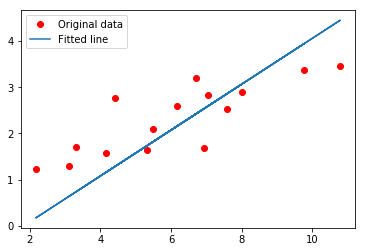

In [6]:
# Plot the graph
"""torch.Tensor.detach()
Detaches the Tensor from the graph that created it, making it a leaf.
        Views cannot be detached in-place.
Why is detach() needed here? https://github.com/pytorch/examples/issues/116
If using .detach(), it will not compute gradient in backward pass, so it's faster.
"""
"""
torch.Tensor.numpy()
torch.from_numpy(x)
"""
"""
model: type torch.nn.modules.linear.Linear
"""
predicted = model(torch.from_numpy(x_train)).detach().numpy()
plt.plot(x_train, y_train, 'ro', label='Original data')
plt.plot(x_train, predicted, label='Fitted line')
plt.legend()
plt.show()

# Save the model checkpoint
"""
torch.nn.modules.module.state_dict:
Both parameters and persistent buffers (e.g. running averages) are
    included. Keys are corresponding parameter and buffer names.
"""
torch.save(model.state_dict(), 'model.ckpt')